# Pie Charts

useful when there are few variables (best for boolean values)

In [48]:
# 1) import libraries & dataset
from datasets import load_dataset
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# 2) format job_posted date in datetime (it was string)
df.job_posted_date = pd.to_datetime(df.job_posted_date)

# 3) add column job posted month to convert job posted datetime
df['job_posted_month'] = df.job_posted_date.dt.month

# 4) convert 'job_skills' into list
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


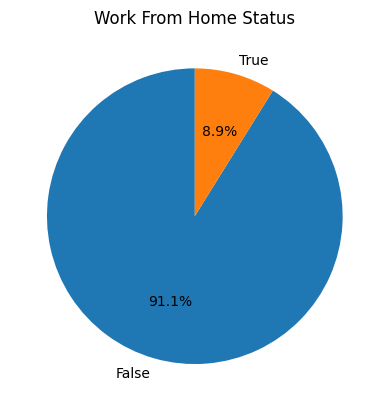

In [49]:
df['job_work_from_home'].value_counts().plot(
    kind='pie', 
    ylabel='', 
    title = 'Work From Home Status', 
    startangle=90, # determines the orientation of the pie
    autopct='%1.1f%%' #set the percentage value un this format 
)
plt.show()

We want now to show 3 pie charts simultaneously for all the boolan values in the df

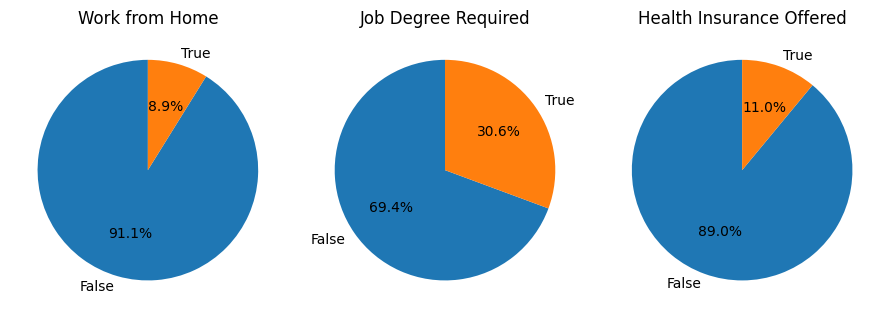

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(9,9))

dict_column={
    'job_work_from_home' : 'Work from Home',
    'job_no_degree_mention' : 'Job Degree Required',
    'job_health_insurance' : 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)
fig.tight_layout()
plt.show()

# Exercises

🟩 Health Insurance Pie Chart (2.14.1) - Problem
Matplotlib Pie Plots
Problem Statement:

Create a pie chart to show the proportion of job postings that mention health insurance for Data Analyst roles only:

    Create a new DataFrame called df_DA that only gets Data Analyst roles.
    Then count the number of data analyst roles that mention or not mention health insurance by using the job_health_insurance column.
    Plot this using plt.pie(), setting labels parameter to ['No', 'Yes'], startangle to 90, and format values to display similarly to 23.1%.
    Set the title to 'Proportion of Data Analyst Jobs Mentioning Health Insurance'.


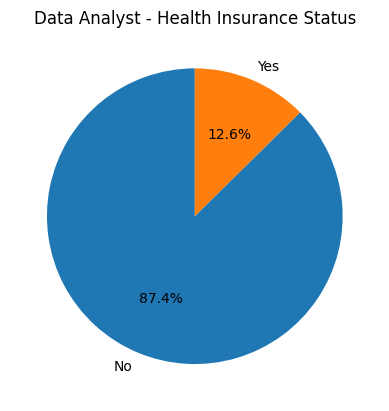

In [51]:
df_da = df[df['job_title_short'] == 'Data Analyst']
insurance_count = df_da['job_health_insurance'].value_counts()
insurance_count.plot(
    kind='pie',
    ylabel='',
    title='Data Analyst - Health Insurance Status',
    labels=['No', 'Yes'],
    startangle=90,
    autopct='%1.1f%%' 
)
plt.show()

🟨 Job Schedule Distribution (2.14.2) - Problem
Matplotlib Pie Plots
Problem Statement:

- Create a pie chart showing the count of job postings per job schedule types (for only jobs that are either 'Full-time' and 'Part-time') in the DataFrame.
- Create a DataFrame to filter out these job_schedule_type called df_ft_pt.
- Plot this using plt.pie(), setting labels parameter to the index, startangle to 90, and format values to display similarly to 23.1%.
- Add a title 'Job Schedule Full-time vs. Part-time'.


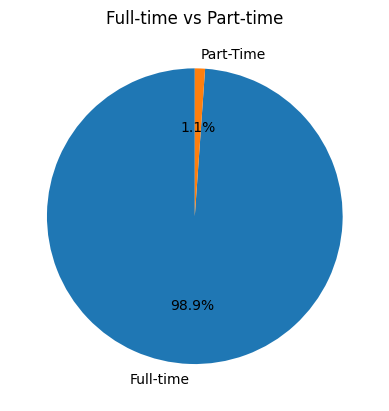

In [66]:
df_ft = df[df['job_schedule_type']=='Full-time'].copy()
df_pt = df[df['job_schedule_type']=='Part-time'].copy()
df_ft_pt = pd.concat([df_ft, df_pt], ignore_index=True)
df_ft_pt = df_ft_pt['job_schedule_type'].value_counts()
df_ft_pt.plot(
    kind='pie',
    labels=['Full-time', 'Part-Time'],
    xlabel='',
    ylabel='',
    title='Full-time vs Part-time',
    startangle=90,
    autopct='%1.1f%%'
)
plt.show()

🟥 Degree Mentioned Pie Chart (2.14.3) - Problem
Matplotlib Pie Plots
Problem Statement:

- Create a pie chart to show the distribution of job postings that mention a degree in the job posting versus those that do not.
- Only get job postings located in the US, create a new DataFrame with this filtered data called df_US. (do it for netherlans)
- Use the job_no_degree_mention column for this purpose.
- Customize the pie chart by exploding the slice for jobs that do not mention a degree. (Use the explode parameter set to (0, 0.1) inside of plt.pie())
- Set the chart title as 'Distribution of Jobs Mentioning Degrees for US Job Postings'.

Hint:

Use the plt.pie() function to create the pie chart and the value_counts() method to get the distribution of degree requirements for US jobs. Use the explode parameter to highlight the slice for jobs that do not require a degree.

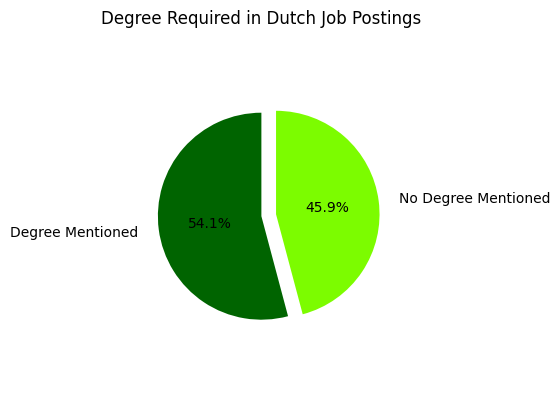

In [ ]:
df_ned = df[df['job_location'] == 'Netherlands'].copy()
degree__not_required = df_ned['job_no_degree_mention'].value_counts()
degree__not_required.plot(
    kind='pie',
    labels=['Degree Mentioned', 'No Degree Mentioned'],
    ylabel='',
    startangle=90,
    autopct='%1.1f%%', #format the percentage
    pctdistance=0.5, # set position of the percentage
    labeldistance=1.2, # set the position od the label
    title='Degree Required in Dutch Job Postings',
    explode=(0,0.1), # explode the pie pieces (in order)
    radius=0.7, # regulates the size of the pie
    colors=['darkgreen', 'lawngreen'] #set the colours of the pie
)
plt.show()